In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
#train_region = "Austin"
#test_region = "SanDiego"
test_region = "Austin"
train_region = "SanDiego"
out_overall = pickle.load(open('../data/input/all_regions.pkl','r'))

train_df = out_overall[train_region]
test_df = out_overall[test_region]

In [3]:
train_regions = ["SanDiego","Austin"]
test_regions = ["Austin","SanDiego"]
appliances = ["fridge","hvac","wm"]
feature = "Monthly"
strategy_list = ["None","CDD","median-aggregate"][:]
import glob

#out has main results from our algos

In [3]:
out = {}
for appliance in appliances:
    out[appliance] = {}
    for train_region in train_regions:
        out[appliance][train_region] = {}
        for test_region in test_regions:
            out[appliance][train_region][test_region] = {}
            for strategy in strategy_list:
                try:
                    directory = '../data/output/cross/%s_%s_%s_%s_%s/' % (train_region, 
                                                                            test_region,
                                                                             strategy,
                                                                            appliance,

                                                                           feature)
                    home_files = glob.glob(directory+"*.csv")
                    out[appliance][train_region][test_region][strategy] = {}
                    homes = []

                    for home_file in home_files:
                        home = int(home_file.split("/")[-1][:-4])
                        homes.append(home)
                        df = pd.read_csv(home_file, index_col=0, header=None).squeeze()
                        df.index.name = "Month"
                        out[appliance][train_region][test_region][strategy][home]=df
                except:
                    pass

In [4]:
pd.DataFrame(out['hvac']['Austin']['SanDiego']['CDD']).T.mean()

Month
7    68.819869
8    70.115969
9    64.984607
dtype: float64

In [5]:
pd.DataFrame(out['hvac']['Austin']['SanDiego']['CDD']).T.mean()

Month
7    68.819869
8    70.115969
9    64.984607
dtype: float64

### Getting LBM results

In [9]:
lbm_pred = '../data/output/lbm_15min_pred_new'

In [52]:
from train_test import *

In [27]:
out_lbm = {}
test_regions = ['SanDiego']
appliances = ['wm','hvac','fridge']
start_month, end_month = 1,12
for test_region in test_regions:
    print test_region
    out_lbm[test_region] = {}
    test_df = out_overall[test_region]
    homes = test_df.index
    for appliance in appliances[:]:
        out_lbm[test_region][appliance] = {}
        for month in range(1, 13):
            out_lbm[test_region][appliance][month] = []
            try:
                for home in homes[1:]:
                    print home, month, appliance
                    pred_df = pd.read_csv(lbm_pred+"/"+str(home)+".csv", index_col=0)[appliance]
                    pred_df.index = pd.to_datetime(pred_df.index)
                    pred_df = pred_df['2015']
                    pred_df.sort(inplace=True)
                    pred_df.index = pred_df.index.month
                    pred = pred_df.ix[month]
                    

                    gt_df = test_df.ix[home][appliance+"_"+str(month)]
                   
                    error = (np.abs(pred-gt_df)/gt_df)*100
                    acc = 100-error
                    if acc<0:
                        acc=0
                    
                    out_lbm[test_region][appliance][month].append(acc)
            except Exception,e:
                print e
            print "here"

SanDiego
203 1 wm
527 1 wm
'2015'
here
203 2 wm
527 2 wm
'2015'
here
203 3 wm
527 3 wm
'2015'
here
203 4 wm
527 4 wm
'2015'
here
203 5 wm
527 5 wm
'2015'
here
203 6 wm
527 6 wm
'2015'
here
203 7 wm
527 7 wm
'2015'
here
203 8 wm
527 8 wm
'2015'
here
203 9 wm
527 9 wm
'2015'
here
203 10 wm
527 10 wm
'2015'
here
203 11 wm
527 11 wm
'2015'
here
203 12 wm
527 12 wm
'2015'
here
203 1 hvac
527 1 hvac
'2015'
here
203 2 hvac
527 2 hvac
'2015'
here
203 3 hvac
527 3 hvac
'2015'
here
203 4 hvac
527 4 hvac
'2015'
here
203 5 hvac
527 5 hvac
'2015'
here
203 6 hvac
527 6 hvac
'2015'
here
203 7 hvac
527 7 hvac
'2015'
here
203 8 hvac
527 8 hvac
'2015'
here
203 9 hvac
527 9 hvac
'2015'
here
203 10 hvac
527 10 hvac
'2015'
here
203 11 hvac
527 11 hvac
'2015'
here
203 12 hvac
527 12 hvac
'2015'
here
203 1 fridge
527 1 fridge
'2015'
here
203 2 fridge
527 2 fridge
'2015'
here
203 3 fridge
527 3 fridge
'2015'
here
203 4 fridge
527 4 fridge
'2015'
here
203 5 fridge
527 5 fridge
'2015'
here
203 6 fridge
527 6 fr

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


In [26]:
homes

Int64Index([  54,  203,  527, 1450, 1524, 1731, 2031, 2354, 2606, 3687, 3864,
            3938, 4083, 4095, 4329, 4495, 4761, 4934, 5009, 5909, 5938, 6268,
            6377, 6429, 6497, 6547, 6689, 7062, 7114, 7409, 7639, 8061, 8342,
            8574, 8733, 8886, 9213, 9370, 9585, 9612, 9775, 9836],
           dtype='int64')

In [25]:
out_lbm

{'SanDiego': {'fridge': {1: [14.618642966168949],
   2: [12.382453796396575],
   3: [53.441754648289681],
   4: [74.506066156102648],
   5: [40.771085554854757],
   6: [62.336047027806345],
   7: [82.604288638703224],
   8: [73.653850402280582],
   9: [74.589364677002607],
   10: [70.883285209782116],
   11: [23.25543248963227],
   12: [42.604963438089491]},
  'hvac': {1: [0],
   2: [0],
   3: [0],
   4: [0],
   5: [0],
   6: [0],
   7: [0],
   8: [0],
   9: [0],
   10: [0],
   11: [0],
   12: [0]},
  'wm': {1: [nan],
   2: [nan],
   3: [nan],
   4: [nan],
   5: [nan],
   6: [nan],
   7: [nan],
   8: [nan],
   9: [nan],
   10: [nan],
   11: [nan],
   12: [nan]}}}

In [18]:
for home in test_df.index:
    print home

54
203
527
1450
1524
1731
2031
2354
2606
3687
3864
3938
4083
4095
4329
4495
4761
4934
5009
5909
5938
6268
6377
6429
6497
6547
6689
7062
7114
7409
7639
8061
8342
8574
8733
8886
9213
9370
9585
9612
9775
9836


In [128]:
pred_df

2014-07-31    329.564517
2014-08-31    334.213446
2014-09-30    246.250388
Name: hvac, dtype: float64

In [126]:
pd.read_csv(lbm_pred+"/"+str(home)+".csv", index_col=0)['wm']

2014-07-31    0.010853
2014-08-31    0.009946
2014-09-30    0.008480
Name: wm, dtype: float64

In [ ]:
import pickle
pickle.dump(out_lbm)

In [160]:
pd.Series(out_lbm['Austin']['hvac'][8]).mean()

55.19657153315526

In [64]:
pred_df['2015'].sort(inplace=True)

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  if __name__ == '__main__':


In [66]:
pred_df.index = pred_df.index.month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [9]:
pd.DataFrame(out_lbm['Austin']['hvac']).T.mean()

7    66.064372
8    64.408978
9    57.276852
dtype: float64

In [162]:
out_lbm['SanDiego']

{'fridge': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []},
 'hvac': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []},
 'wm': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []}}

### Getting regional averages results

In [10]:
regional_percentages = {"Austin":
                            {"hvac":0.28,'fridge':0.09},
                        "SanDiego":
                            {"hvac":0.16,"fridge":0.15}
                        }

In [11]:
out_reg = {}
for appliance in appliances:
    out_reg[appliance] = {}
    for test_region in test_regions:
        out_reg[appliance][test_region] = {}
        unscaled_test_dataset_df = unscaled_df_regions[test_region]
        pred = unscaled_test_dataset_df[['aggregate_'+str(month) for month in range(start_month, end_month)]]*regional_percentages[test_region][appliance]
        pred.columns = [appliance+"_"+str(month) for month in range(start_month, end_month)]
        gt =  unscaled_test_dataset_df[[appliance+"_"+str(month) for month in range(start_month, end_month)]]
        error = (gt-pred).abs().div(gt).mul(100)
        error[error>100] = 0
        acc = 100-error
        acc_mean = acc.mean()
        acc_mean.index = range(start_month, end_month)
        out_reg[appliance][test_region] = acc_mean

In [12]:
pd.DataFrame(out_reg['fridge'])['Austin']

7    76.952015
8    80.739431
9    79.531380
Name: Austin, dtype: float64

In [13]:
overall = {}
for test_region in test_regions:
    overall[test_region] = {}
    for appliance in appliances:
        overall[test_region][appliance] = {}
        overall[test_region][appliance]["Regional average"] = pd.DataFrame(out_reg[appliance])[test_region]
        overall[test_region][appliance]["NILM"] = pd.DataFrame(out_lbm[test_region][appliance]).T.mean()
        if test_region=="Austin":
            train_region="SanDiego"
        elif test_region=="SanDiego":
            train_region="Austin"
        temp = {}
        for strat in ["CDD","median-aggregate","None"]:
            temp[strat] = pd.DataFrame(out[appliance][train_region][test_region][strat]).T.mean().squeeze()
            
        overall[test_region][appliance]["Our approach"] = pd.DataFrame(temp).max(axis=1)

In [14]:
pd.DataFrame(overall['Austin']['fridge'])

,NILM,Our approach,Regional average
7,73.229477,71.406323,76.952015
8,73.971712,69.030500,80.739431
9,70.526687,66.698209,79.531380


In [15]:
import sys
sys.path.append("../code/")

In [16]:
from common_functions import tableau20blind, format_axes, latexify

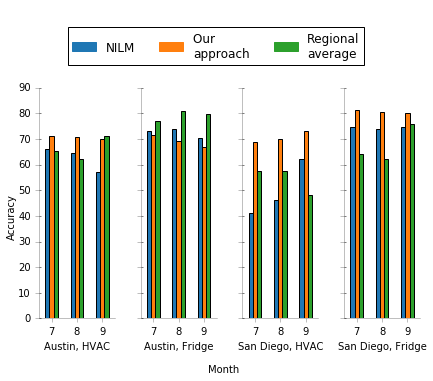

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
#latexify(columns=1)
fig, ax = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True)
pd.DataFrame(overall['Austin']['hvac']).plot(kind="bar",rot=0, colors=tableau20blind[::2],ax=ax[0],legend=False)
pd.DataFrame(overall['Austin']['fridge']).plot(kind="bar",rot=0, colors=tableau20blind[::2],ax=ax[1],legend=False)
pd.DataFrame(overall['SanDiego']['hvac']).plot(kind="bar",rot=0, colors=tableau20blind[::2],ax=ax[2],legend=False)
pd.DataFrame(overall['SanDiego']['fridge']).plot(kind="bar",rot=0, colors=tableau20blind[::2],ax=ax[3],legend=False)
format_axes(ax[0])
format_axes(ax[1])
format_axes(ax[2])
format_axes(ax[3])
ax[0].set_xlabel('Austin, HVAC')
ax[1].set_xlabel('Austin, Fridge')
ax[2].set_xlabel('San Diego, HVAC')
ax[3].set_xlabel('San Diego, Fridge')


#ax[0,0].set_ylabel("Austin")
#ax[1,0].set_ylabel("San Diego")
#ax[1,0].set_xlabel("HVAC")
#ax[1,1].set_xlabel("Fridge")
import matplotlib.patches as mpatches


baseline_patch = mpatches.Patch(color=tableau20blind[::2][0],alpha=1, label='Baseline')
defrost_patch =  mpatches.Patch(color=tableau20blind[::2][1],alpha=1, label='Defrost')
defrost_next =  mpatches.Patch(color=tableau20blind[::2][2],alpha=1, label='Increased compressor\n runtime due to defrost')
#plt.tight_layout()






fig.text(0.5, -0.04, 'Month', ha='center')
fig.text(-0.0, 0.5, 'Accuracy', va='center', rotation='vertical')

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3,handles=[baseline_patch, defrost_patch, defrost_next],labels=['NILM','Our \napproach','Regional\naverage'])
plt.savefig("../results/cross-main.pdf",bbox_inches="tight")
plt.savefig("../results/cross-main.png",bbox_inches="tight")

In [52]:
acc_df = acc_df[['Regional average', u'Train on Austin, No transformation',
       u'Train on Austin, Transformation by CDD',
       u'Train on Austin, Transformation by median', u'Train on SD']]

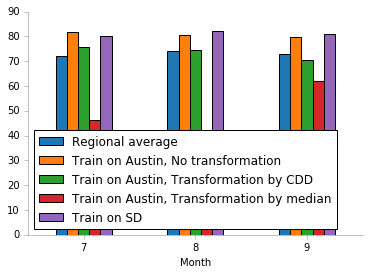

In [54]:
import matplotlib.pyplot as plt
acc_df.plot(kind="bar",rot=0, colors=tableau20blind[::2]).legend(loc=3)
format_axes(plt.gca())
plt.savefig("../results/cross_fridge_austin_sd.pdf")
plt.savefig("../results/cross_fridge_austin_sd.png")